In [1]:
import sys
sys.path.append('../src')
import shutil
import yaml
import py7zr
import os
import s3fs
from satellite_image import SatelliteImage
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import rasterio.plot as rp
import re
from datetime import datetime

In [2]:
with open("../environment.yml") as f:
    environment = yaml.safe_load(f)

bucket = environment["bucket"]
path_s3_cayenne_data = environment["sources"]["cayenne"]
path_local_cayenne_data = environment["local-path"]["cayenne"]

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})


In [ ]:
## NO RUN
fs.get(f"{bucket}/{path_s3_cayenne_data}", f"../{path_local_cayenne_data}")
with py7zr.SevenZipFile(f"../{path_local_cayenne_data}", mode="r") as z:
    z.extractall()

shutil.move(
    os.path.splitext(os.path.basename(path_s3_cayenne_data))[0],
    os.path.splitext(f"../{path_local_cayenne_data}")[0],
)

In [3]:
images_paths = ["../data/Cayenne/16bits/ORT_2022072050325085_U22N/" + p for p in os.listdir(f"../data/Cayenne/16bits/ORT_2022072050325085_U22N/")]

In [4]:
list_images = [
     SatelliteImage.from_raster(
        filename,
        date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d'), 
        n_bands = 4
    ) for filename in images_paths[:5]]

On split les images et on ne garde que les images qui sont pertinentes selon un seuil de 50% de pixels non noir.

In [9]:
splitted_list_images = [SatelliteImage.filter_images(im) for sublist in list_images for im in sublist.split(250) if SatelliteImage.filter_images(im) is not None]

In [12]:
from labeler import RILLabeler
from labeled_satellite_image import SegmentationLabeledSatelliteImage

In [13]:
os.environ["AWS_ACCESS_KEY_ID"] = "projet-slums-sa"
os.environ["AWS_SECRET_ACCESS_KEY"] = "hB2N6hCmp7JoFA6WHKT022WJ9lOc1oOr"

In [14]:
labeler = RILLabeler(datetime.strptime(re.search(r'ORT_(\d{8})', images_paths[0]).group(1), '%Y%m%d'))

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [16]:
mask = labeler.create_segmentation_label(splitted_list_images[0])

ValueError: No valid geometry objects found for rasterize

In [64]:
splitted_list_images[0].array

array([[[ 277,  296,  322, ...,  399,  409,  426],
        [ 282,  304,  336, ...,  390,  393,  425],
        [ 273,  305,  332, ...,  374,  374,  402],
        ...,
        [ 288,  295,  278, ...,  342,  366,  344],
        [ 299,  296,  294, ...,  321,  374,  394],
        [ 338,  328,  334, ...,  339,  378,  395]],

       [[ 427,  457,  498, ...,  576,  591,  616],
        [ 435,  470,  520, ...,  562,  567,  612],
        [ 421,  472,  513, ...,  538,  537,  579],
        ...,
        [ 445,  455,  430, ...,  517,  556,  522],
        [ 461,  457,  453, ...,  484,  565,  596],
        [ 520,  505,  513, ...,  511,  569,  596]],

       [[ 488,  522,  567, ...,  619,  634,  661],
        [ 498,  537,  592, ...,  606,  611,  659],
        [ 483,  540,  586, ...,  581,  581,  625],
        ...,
        [ 497,  510,  482, ...,  596,  635,  593],
        [ 514,  510,  506, ...,  559,  648,  679],
        [ 578,  562,  572, ...,  592,  655,  682]],

       [[1496, 1606, 1757, ..., 1914,

We can split a satellite image using the `split()` method : 

In [ ]:
list_images = image.split(256)

Each satellite image can be displayed by using the `plot()` method and specifying the desired bands : 

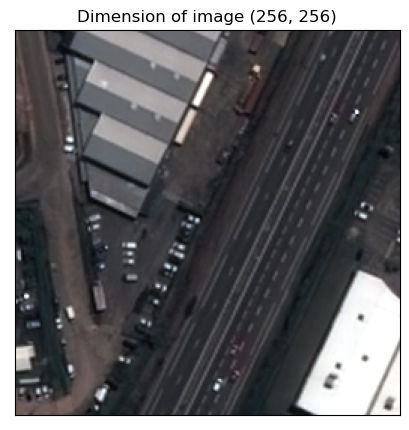

In [6]:
list_images[0].plot([0, 1, 2]) # RGB (3 premières bandes)

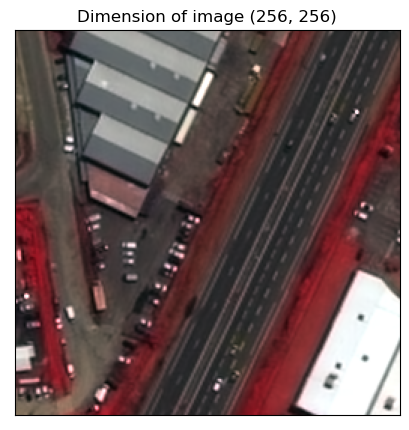

In [7]:
list_images[0].plot([3, 0, 1]) # RGB (Infrarouge, rouge, vert)

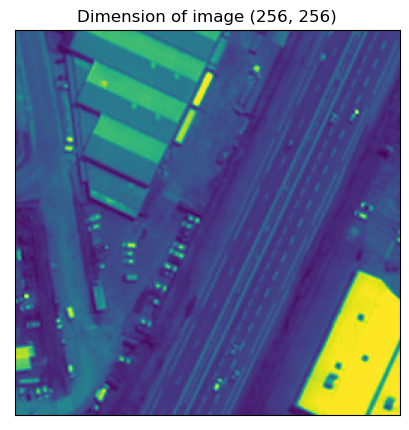

In [8]:
list_images[0].plot([0]) # Une seule bande